In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python gTTS tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq
import cv2
import random as rn
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder as le
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')


[]

In [ ]:
def make_train_data(label, DIR):
    for img in tq(os.listdir(DIR)):
        try:
            path = os.path.join(DIR, img)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass


In [ ]:
X = []  # Images
Z = []  # Labels
IMG_SIZE = 100

# Define paths to your dataset folders
nor = '/content/drive/MyDrive/dataset/normal'  # Path to normal road images
pot = '/content/drive/MyDrive/dataset/potholes'  # Path to pothole images

make_train_data('NORMAL', nor)
make_train_data('POTHOLES', pot)


  0%|          | 0/372 [00:00<?, ?it/s]

  0%|          | 0/339 [00:00<?, ?it/s]

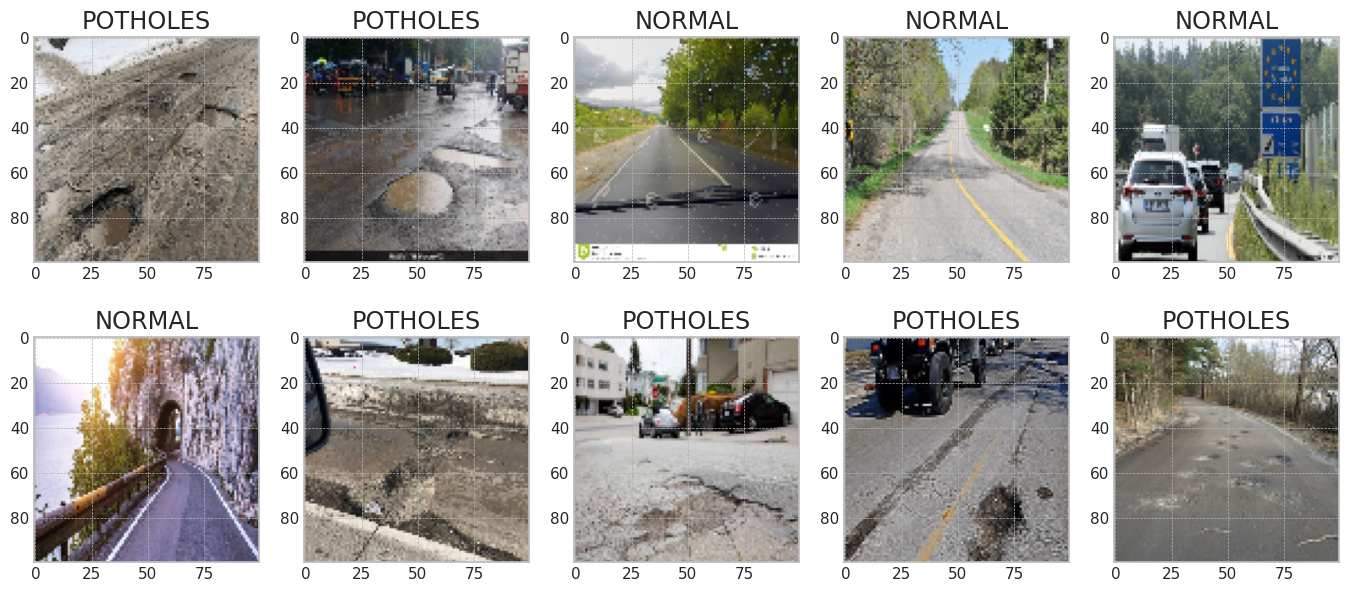

In [ ]:
fig, ax = plt.subplots(2, 5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15, 15)

for i in range(2):
    for j in range(5):
        l = rn.randint(0, len(Z))
        ax[i, j].imshow(X[l][:,:,::-1])
        ax[i, j].set_title(Z[l])
        ax[i, j].set_aspect('equal')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 2)

X = np.array(X)
X = X / 255.0

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (710, 100, 100, 3)
Shape of Y: (710, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 47, 47, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       8,667,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,706,626 (33.21 MB)

 Trainable params: 8,706,626 (33.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.4781 - loss: 1.0853 - val_accuracy: 0.5439 - val_loss: 0.6365
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7475 - loss: 0.5559 - val_accuracy: 0.6842 - val_loss: 0.5460
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8032 - loss: 0.4062 - val_accuracy: 0.8596 - val_loss: 0.2934
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9194 - loss: 0.2381 - val_accuracy: 0.9298 - val_loss: 0.2375
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9172 - loss: 0.1948 - val_accuracy: 0.8596 - val_loss: 0.3698
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9315 - loss: 0.2116 - val_accuracy: 0.8947 - val_loss: 0.3129
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9668 - loss: 0.1197 - val_accuracy: 0.9123 - val_loss: 0.2013
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9845 - loss: 0.0712 - val_accuracy: 0.9474 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy * 100))
print('Test loss: {:2.2f}%'.format(loss * 100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9057 - loss: 0.3911
Test accuracy: 90.85%
Test loss: 36.93%


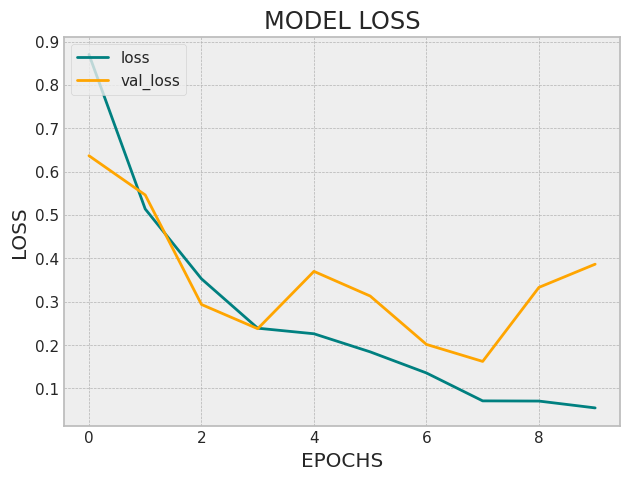

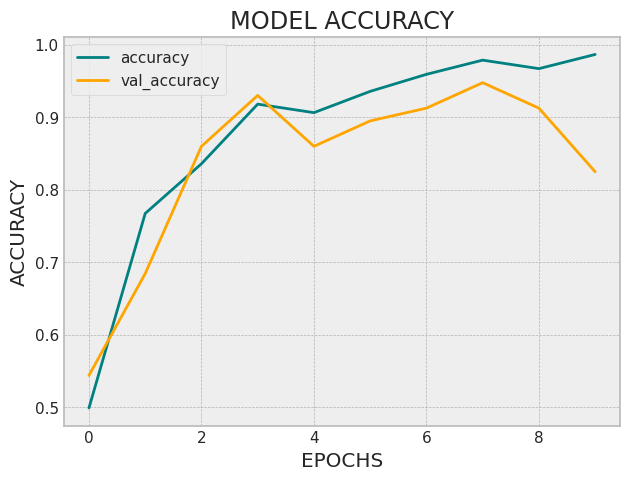

In [ ]:
plt.style.use('bmh')
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(loc='upper left')
plt.show()

plt.style.use('bmh')
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='upper left')
plt.show()


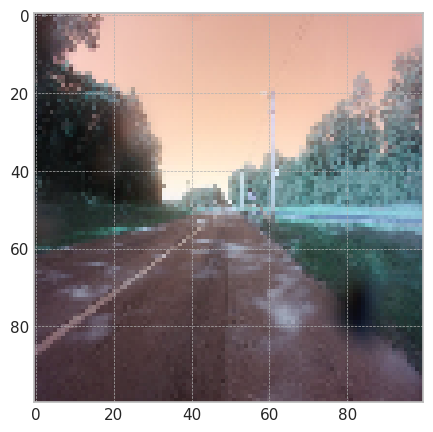

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
It is a Plain Road


In [ ]:
import random
indx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[indx2])
plt.show()

Y_pred = np.round(model.predict(X_test[indx2].reshape(1, 100, 100, 3)))
if Y_pred[0][0] == 1:
    print("It is a Plain Road")
    op = "Plain Road" #using this code the image which is shown to only black
else:
    print("It is a Pothole Road")
    op = "Pothole Road"

In [ ]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

speech = op
gtts_obj = gTTS(text=speech, lang="en", slow=False)
gtts_obj.save("/content/output.wav")
Audio("/content/output.wav")
